In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random
import numpy
from collections import defaultdict 
import sys
sys.setrecursionlimit(1500)
import time

In [2]:
n = 100 #n - number of vertices
edges = 200 #edges - number of edges

In [3]:
#creating adjacency matrix
def create_adjacency_matrix(n, edges):
  adjacency_matrix = numpy.zeros((n, n))
  current_edge = 0
  while current_edge < edges:
    i = numpy.random.randint(0, n)
    j = numpy.random.randint(0, n)
    if i != j and adjacency_matrix[i][j] == 0:
      adjacency_matrix[i][j] = 1
      adjacency_matrix[j][i] = 1
      current_edge += 1
  return adjacency_matrix

In [4]:
adjMatrix = create_adjacency_matrix(n,edges)
print("The first seven columns and strings in adjacency matrix:")
print(adjMatrix[:7,:7])

The first seven columns and strings in adjacency matrix:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [6]:
# trasfer adjacency matrix to adjacency list
def matrix_to_list(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
            if a[i][j]== 1:
              adjList[i].append(j)
    return adjList

In [7]:
AdjList = matrix_to_list(adjMatrix)
print("The first seven elements of adjacency list:")
# print the adjacency list
for i in range(7):
    print(i, end =":")
    for j in AdjList[i]:
        print("{0} ".format(j), end ="")
    print()

The first seven elements of adjacency list:
0:
1:5 26 68 71 
2:43 54 70 80 83 
3:10 19 44 69 75 85 
4:55 63 64 
5:1 51 
6:43 50 85 


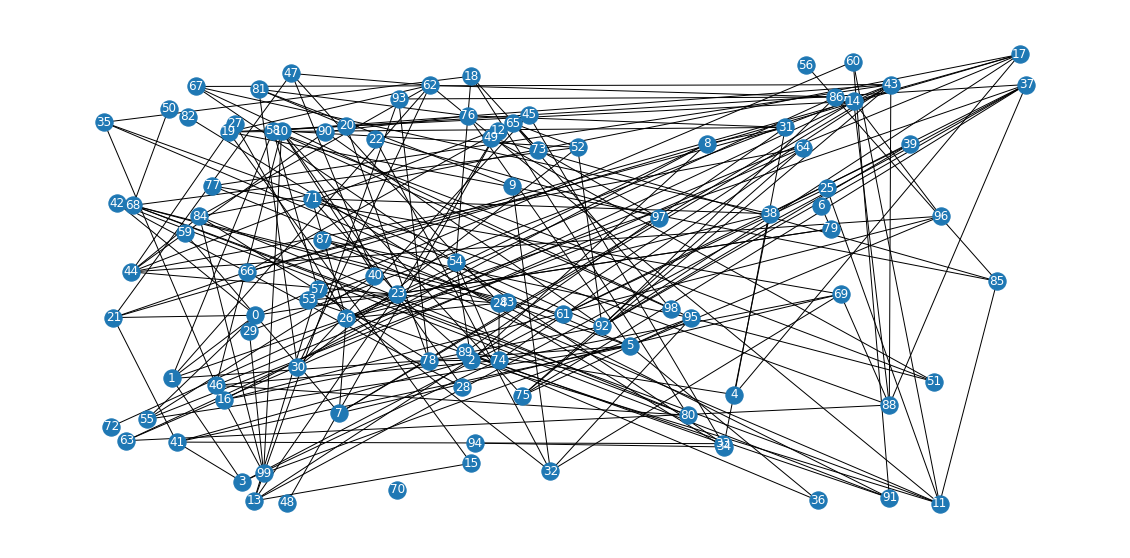

In [ ]:
#Visualizing the graph
G = nx.Graph(adjMatrix)
pos = nx.random_layout(G)
plt.figure(figsize=(20,10))
labels = {}
for k in range(100):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_color="white")
nx.draw(G, pos)


In [ ]:
V = 8 #number of verticles
adj = [[] for i in range(V)]

# method to add an undirected edge
def addEdge(v, w):
    adj[v].append(w)
    adj[w].append(v)

def dfs(temp, v, visited):
    # Mark the current vertex as visited
    visited[v] = True
    # Store the vertex to list
    temp.append(v)
    # Repeat for all vertices adjacent
    # to this vertex v
    for i in adj[v]:
        if visited[i] == False:
            # Update the list
            temp = dfs(temp, i, visited)
    return temp

# Method to retrieve connected components in an undirected graph
def connectedComponents():
    visited = []
    cc = []
    for i in range(V):
        visited.append(False)
    for v in range(V):
        if visited[v] == False:
            temp = []
            cc.append(dfs(temp, v, visited))
    return cc

In [ ]:
# method to add an undirected edge
def addEdge_toArr(v, w):
    adj[v].append(w)
    adj[w].append(v)

In [ ]:
addEdge_toArr(1, 0)
addEdge_toArr(2, 3)
addEdge_toArr(3, 4)
addEdge_toArr(2, 6)
addEdge_toArr(1, 5)
addEdge_toArr(1, 7)
print(adj)

[[1], [0, 5, 7], [3, 6], [2, 4], [3], [1], [2], [1]]


In [ ]:
print("Connected components:")
connectedComponents()

Connected components:


[[0, 1, 5, 7], [2, 3, 4, 6]]

In [16]:
graph = defaultdict(list)
def addEdge_toDict(u,v):
    graph[u].append(v)
    graph[v].append(u)

addEdge_toDict(0, 2)
addEdge_toDict(1, 2)
addEdge_toDict(2, 5)
addEdge_toDict(3, 5)
addEdge_toDict(3, 7)
addEdge_toDict(4, 5)
addEdge_toDict(6, 0)
print(graph)

defaultdict(<class 'list'>, {0: [2, 6], 2: [0, 1, 5], 1: [2], 5: [2, 3, 4], 3: [5, 7], 7: [3], 4: [5], 6: [0]})


In [14]:
def bfs(graph, start, end):
  # maintain a queue of paths
  queue = []
  # push the first path into the queue
  queue.append([start])
  try:
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a new path and push it into the queue
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)
  except:
   result = ("not exist")
   return result

In [20]:
start = 2
end = 4
# BFS
print( "The shortest path between {0} and {1} is ".format(start, end),bfs(graph, start, end))


The shortest path between 2 and 4 is  [2, 5, 4]
